 INDIAN KIDS SCREEN TIME DATA SET PROJECT

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

 LOAD CSV DATASET

In [ ]:
df=pd.read_csv('/content/Indian_Kids_Screen_Time.csv')

SHOW UPPER 5 ROW

In [ ]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


VIEW THE INFO OF DATA SET


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


FILLING THE NONE VALUES IN HEALTH_IMPACT

In [ ]:
df.fillna({'Health_Impacts':'None'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


SCREEN TIME DISTRIBUTION

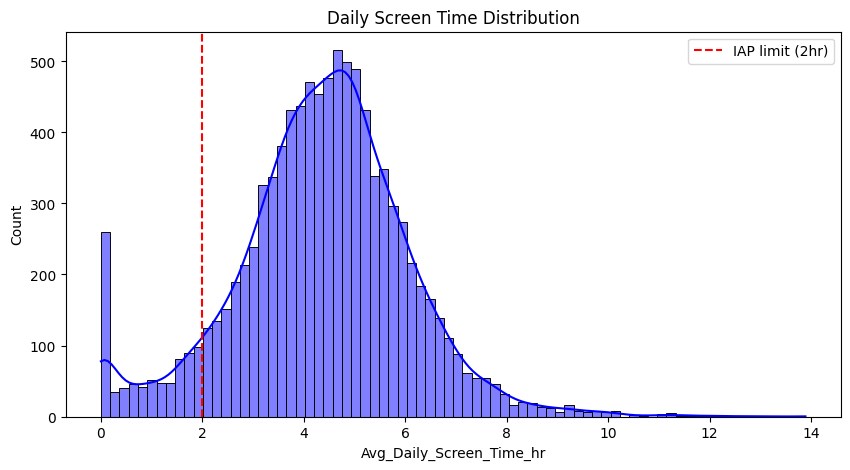

In [ ]:
from matplotlib.typing import ColourType
plt.figure(figsize=(10,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'],kde=True,C='blue')
plt.axvline(2,color='red',linestyle='--',label='IAP limit (2hr)')
plt.title('Daily Screen Time Distribution')
plt.legend()
plt.show()


which device mostly used

/tmp/ipython-input-741811230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Primary_Device',palette='viridis')


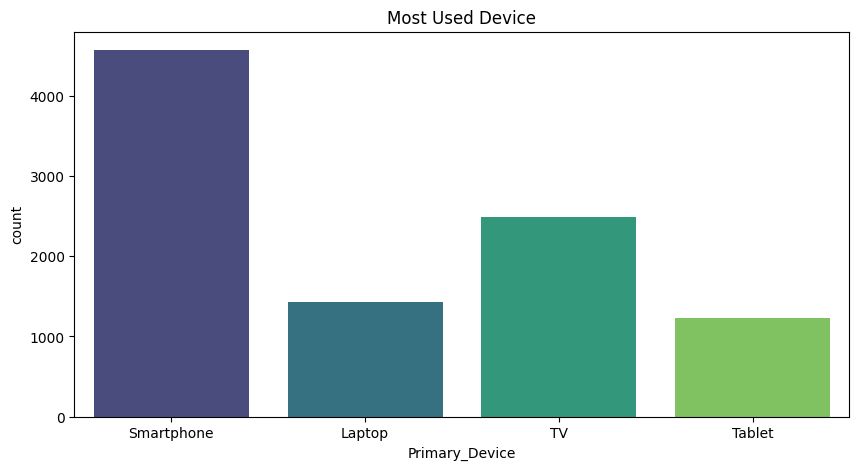

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Primary_Device',palette='viridis')
plt.title('Most Used Device')
plt.show()

RELATION BETWEEN AGE VS SCREEN TIME

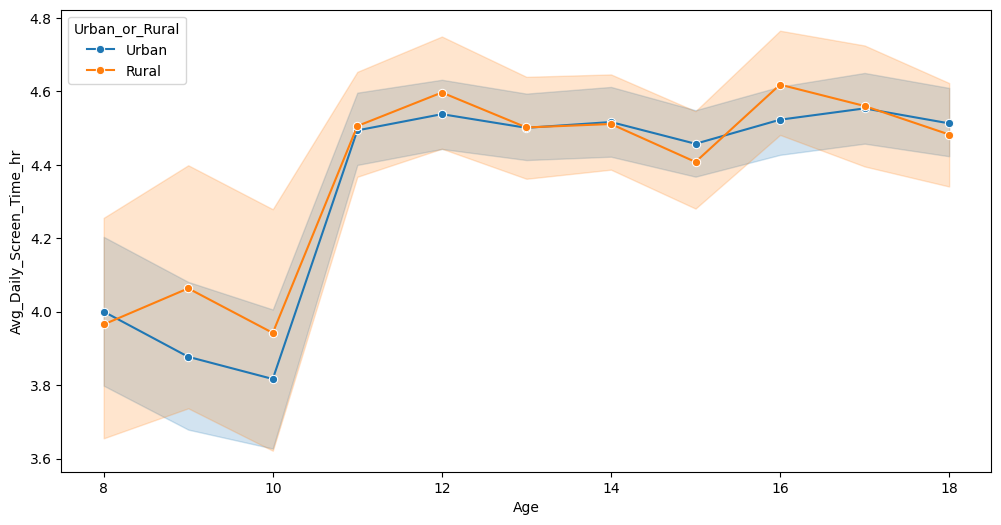

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Age',y='Avg_Daily_Screen_Time_hr',marker='o',color='red',hue='Urban_or_Rural')
plt.show()

GENDER WISE SCREEN TIME

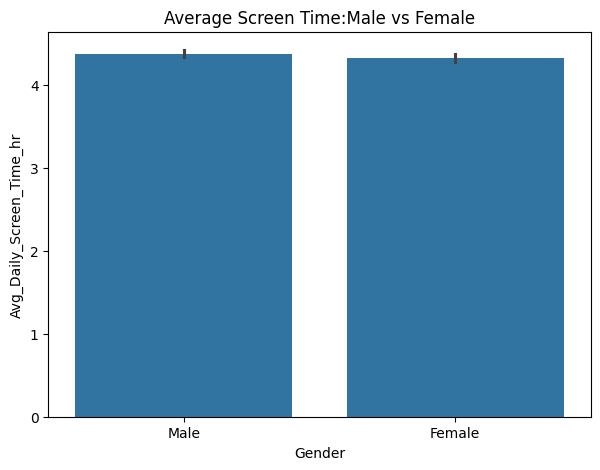

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='Avg_Daily_Screen_Time_hr')
plt.title('Average Screen Time:Male vs Female')
plt.show()

HEALTH IMPACT ANALYSIS vs SCREEN TIME

/tmp/ipython-input-2303773628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Health_Impacts',y='Avg_Daily_Screen_Time_hr',palette='viridis')


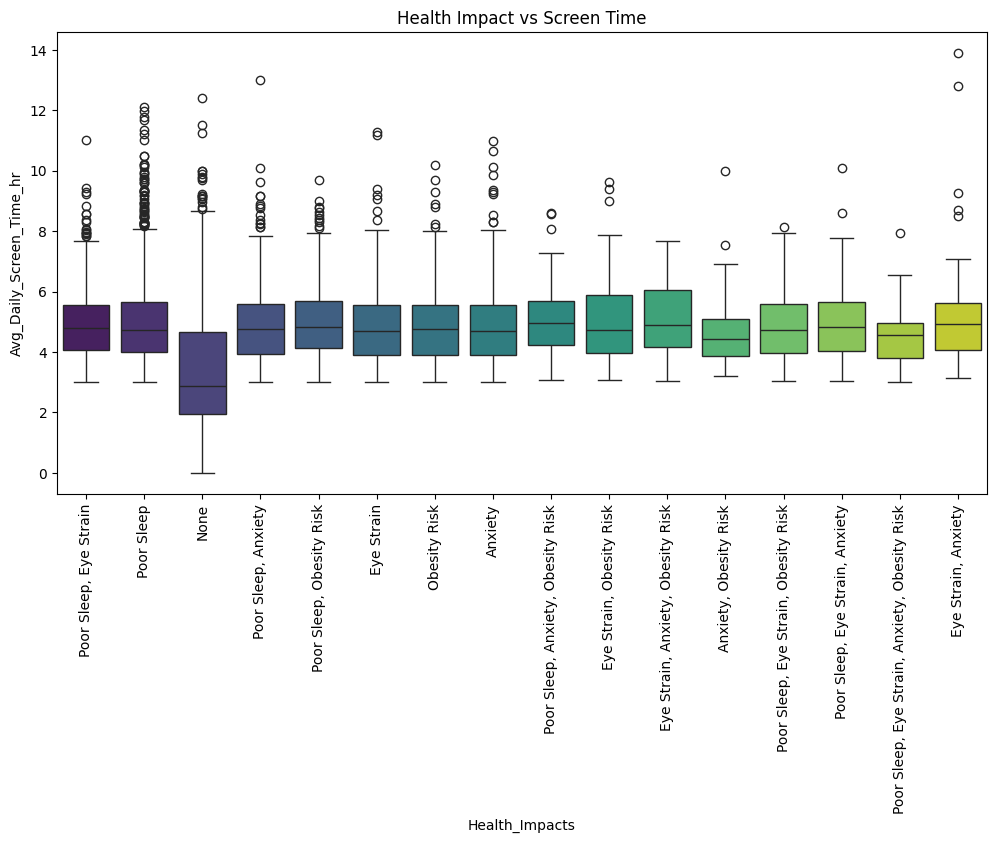

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Health_Impacts',y='Avg_Daily_Screen_Time_hr',palette='viridis')
plt.title('Health Impact vs Screen Time')
plt.xticks(rotation=90)
plt.show()

  CORRELATION
  

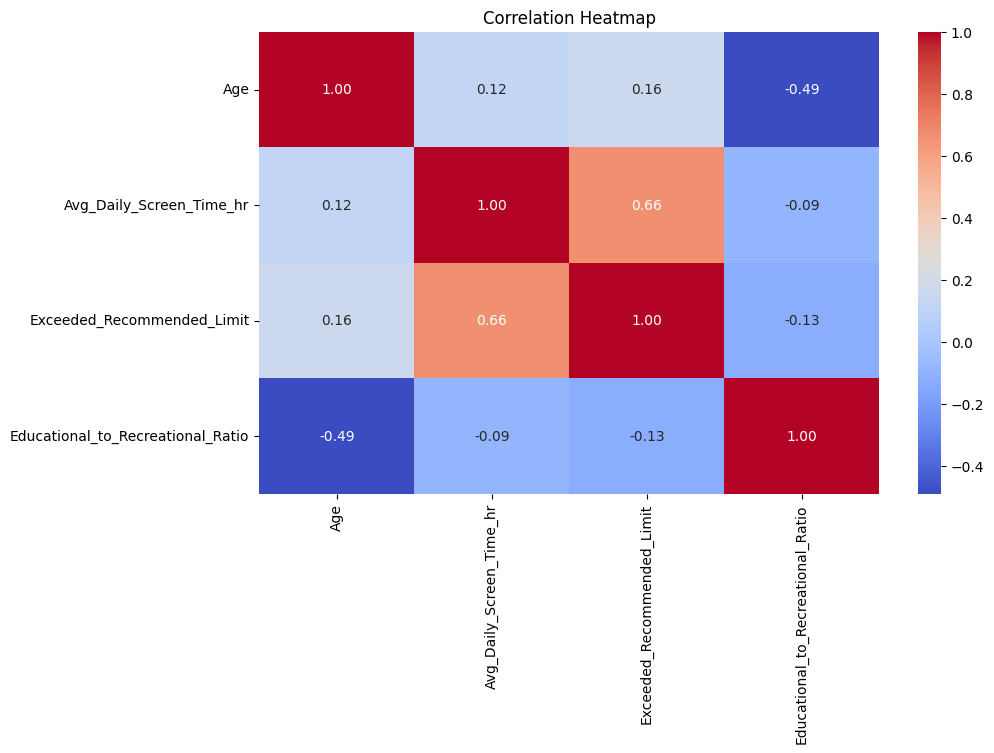

In [ ]:
numeric_df = df.select_dtypes(include=['number', 'bool'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

KEY INSIGHTS

In [ ]:
limit_cross=(df['Exceeded_Recommended_Limit'].sum() /len(df))*100
print(f"result:{limit_cross:.2f}%")

result:85.47%
